In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconf

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

In [ ]:
import seaborn as sns
import matplotlib.ticker as ticker

In [ ]:
import json
import requests
from bs4 import BeautifulSoup
import pandas as pd

# 년도별 우울증 환자 추이

In [ ]:
dep_data = pd.read_excel("2_국민관심질병성별연령10세구간(심사년도).xls", thousands=',', header=6)
dep_data.head(7)

,Unnamed: 0,Unnamed: 1,심사년도,2016년,2016년.1,2016년.2,2016년.3,2016년.4,2017년,2017년.1,...,2019년,2019년.1,2019년.2,2019년.3,2019년.4,2020년,2020년.1,2020년.2,2020년.3,2020년.4
0,항목,성별구분,연령구분10세,환자수,내원일수,청구건수,요양급여비용총액,보험자부담금,환자수,내원일수,...,환자수,내원일수,청구건수,요양급여비용총액,보험자부담금,환자수,내원일수,청구건수,요양급여비용총액,보험자부담금
1,우울증,계,계,643102,5176296,4529896,258367214,175367975,680169,5418846,...,796364,6473779,5910574,377699064,283271858,837808,6816545,6347931,408073951,310507841
2,우울증,남,소계,211796,1738618,1425474,90108472,61551900,225519,1823269,...,266946,2149696,1883278,127564735,95042133,276366,2208358,1987104,134273120,101476091
3,우울증,남,0_9세,669,3098,3041,166317,109726,732,3571,...,927,4637,4619,316983,241206,822,4397,4398,308901,238080
4,우울증,남,10_19세,12203,93851,80439,5715137,3805702,13023,100989,...,17999,142154,128916,10128795,7596274,18012,140683,128142,10509320,8016969
5,우울증,남,20_29세,27457,201325,176072,11443941,7454618,31906,237037,...,46216,353723,328923,23091856,16979487,51919,400112,378466,27100730,20446708
6,우울증,남,30_39세,25469,179547,154609,9366227,6418664,28289,193240,...,36186,253507,236549,15790748,12027891,39851,282832,271730,18108988,13930108


In [ ]:
dep_data = dep_data.T
dep_data.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
Unnamed: 0,항목,우울증,우울증,우울증,우울증,우울증,우울증,우울증,우울증,우울증,...,우울증,우울증,우울증,우울증,우울증,우울증,우울증,우울증,우울증,우울증
Unnamed: 1,성별구분,계,남,남,남,남,남,남,남,남,...,여,여,여,여,여,여,여,여,여,여
심사년도,연령구분10세,계,소계,0_9세,10_19세,20_29세,30_39세,40_49세,50_59세,60_69세,...,소계,0_9세,10_19세,20_29세,30_39세,40_49세,50_59세,60_69세,70_79세,80세이상
2016년,환자수,643102,211796,669,12203,27457,25469,31608,37767,36891,...,431306,367,13962,37040,50482,61761,86872,85529,79024,32699
2016년.1,내원일수,5176296,1738618,3098,93851,201325,179547,248427,320999,317933,...,3437678,1588,108261,263627,386226,492716,659642,660892,609319,255407


In [ ]:
dep_data = dep_data.loc[["심사년도", "2016년", "2017년", "2018년", "2019년", "2020년"], :]
dep_data

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
심사년도,연령구분10세,계,소계,0_9세,10_19세,20_29세,30_39세,40_49세,50_59세,60_69세,...,소계,0_9세,10_19세,20_29세,30_39세,40_49세,50_59세,60_69세,70_79세,80세이상
2016년,환자수,643102,211796,669,12203,27457,25469,31608,37767,36891,...,431306,367,13962,37040,50482,61761,86872,85529,79024,32699
2017년,환자수,680169,225519,732,13023,31906,28289,33784,38395,38436,...,454650,424,16728,44340,54645,64507,86845,88983,80820,36093
2018년,환자수,751930,251648,766,16123,39826,32594,37403,40792,40464,...,500282,438,26412,58608,60795,68481,88463,93248,84253,39940
2019년,환자수,796364,266946,927,17999,46216,36186,39419,41782,41108,...,529418,507,29866,72177,68492,72375,87976,94240,83653,41533
2020년,환자수,837808,276366,822,18012,51919,39851,40992,41000,41187,...,561442,516,30633,95058,77335,74891,85351,96249,81286,43261


In [ ]:
dep_data = dep_data.reset_index()
dep_data

,index,0,1,2,3,4,5,6,7,8,...,12,13,14,15,16,17,18,19,20,21
0,심사년도,연령구분10세,계,소계,0_9세,10_19세,20_29세,30_39세,40_49세,50_59세,...,소계,0_9세,10_19세,20_29세,30_39세,40_49세,50_59세,60_69세,70_79세,80세이상
1,2016년,환자수,643102,211796,669,12203,27457,25469,31608,37767,...,431306,367,13962,37040,50482,61761,86872,85529,79024,32699
2,2017년,환자수,680169,225519,732,13023,31906,28289,33784,38395,...,454650,424,16728,44340,54645,64507,86845,88983,80820,36093
3,2018년,환자수,751930,251648,766,16123,39826,32594,37403,40792,...,500282,438,26412,58608,60795,68481,88463,93248,84253,39940
4,2019년,환자수,796364,266946,927,17999,46216,36186,39419,41782,...,529418,507,29866,72177,68492,72375,87976,94240,83653,41533
5,2020년,환자수,837808,276366,822,18012,51919,39851,40992,41000,...,561442,516,30633,95058,77335,74891,85351,96249,81286,43261


In [ ]:
dep_data.columns

Index(['index',       0,       1,       2,       3,       4,       5,       6,
             7,       8,       9,      10,      11,      12,      13,      14,
            15,      16,      17,      18,      19,      20,      21],
      dtype='object')

In [ ]:
dep_total = pd.melt(
    dep_data,
    id_vars=["index"],
    value_vars=[1, 2, 12]

)
dep_total

,index,variable,value
0,심사년도,1,계
1,2016년,1,643102
2,2017년,1,680169
3,2018년,1,751930
4,2019년,1,796364
5,2020년,1,837808
6,심사년도,2,소계
7,2016년,2,211796
8,2017년,2,225519
9,2018년,2,251648


In [ ]:
dep_total = dep_total.loc[dep_total["index"] != "심사년도", :]
dep_total.loc[dep_total["variable"]==1, "variable"]="전체 우울증 환자 수"
dep_total.loc[dep_total["variable"]==2, "variable"]="남성 우울증 환자 수"
dep_total.loc[dep_total["variable"]==12, "variable"]="여성 우울증 환자 수"
dep_total

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


,index,variable,value
1,2016년,전체 우울증 환자 수,643102
2,2017년,전체 우울증 환자 수,680169
3,2018년,전체 우울증 환자 수,751930
4,2019년,전체 우울증 환자 수,796364
5,2020년,전체 우울증 환자 수,837808
7,2016년,남성 우울증 환자 수,211796
8,2017년,남성 우울증 환자 수,225519
9,2018년,남성 우울증 환자 수,251648
10,2019년,남성 우울증 환자 수,266946
11,2020년,남성 우울증 환자 수,276366


In [ ]:
dep_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15 entries, 1 to 17
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     15 non-null     object
 1   variable  15 non-null     object
 2   value     15 non-null     object
dtypes: object(3)
memory usage: 480.0+ bytes


In [ ]:
dep_total = dep_total.astype({"value":"int"})

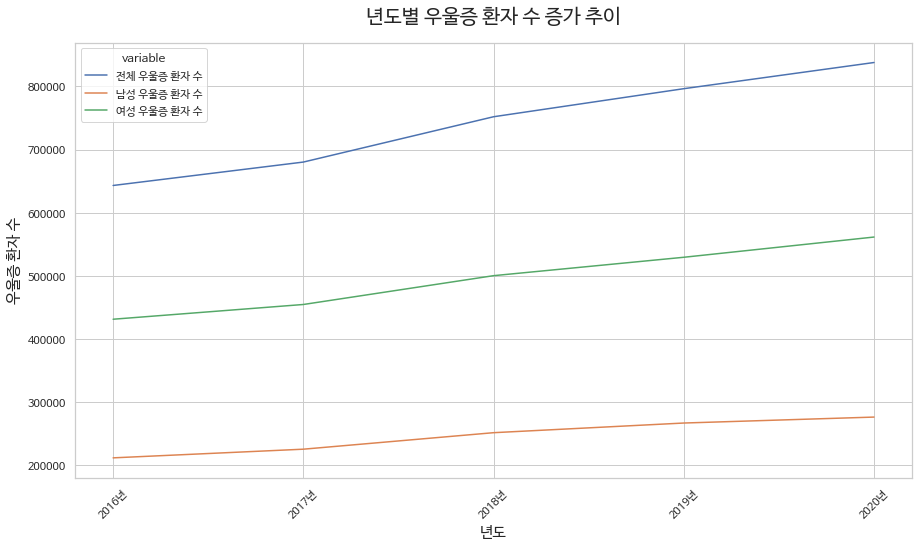

In [ ]:
sns.set_theme( style="whitegrid", palette="deep")
plt.rc('font', family='NanumBarunGothic')
plt.xticks(rotation=45)

g = sns.lineplot(x='index', y='value', hue='variable', data=dep_total)
g.figure.set_size_inches(15, 8)

g.set_title("년도별 우울증 환자 수 증가 추이", fontsize=20, pad=20)
g.set_xlabel("년도", fontsize=15)
g.set_ylabel("우울증 환자 수", fontsize=15)

plt.show()

# 연령대별 우울증 데이터 분석

In [ ]:
dep_data

,index,0,1,2,3,4,5,6,7,8,...,12,13,14,15,16,17,18,19,20,21
0,심사년도,연령구분10세,계,소계,0_9세,10_19세,20_29세,30_39세,40_49세,50_59세,...,소계,0_9세,10_19세,20_29세,30_39세,40_49세,50_59세,60_69세,70_79세,80세이상
1,2016년,환자수,643102,211796,669,12203,27457,25469,31608,37767,...,431306,367,13962,37040,50482,61761,86872,85529,79024,32699
2,2017년,환자수,680169,225519,732,13023,31906,28289,33784,38395,...,454650,424,16728,44340,54645,64507,86845,88983,80820,36093
3,2018년,환자수,751930,251648,766,16123,39826,32594,37403,40792,...,500282,438,26412,58608,60795,68481,88463,93248,84253,39940
4,2019년,환자수,796364,266946,927,17999,46216,36186,39419,41782,...,529418,507,29866,72177,68492,72375,87976,94240,83653,41533
5,2020년,환자수,837808,276366,822,18012,51919,39851,40992,41000,...,561442,516,30633,95058,77335,74891,85351,96249,81286,43261


In [ ]:
dep_data= dep_data.T
dep_data

,0,1,2,3,4,5
index,심사년도,2016년,2017년,2018년,2019년,2020년
0,연령구분10세,환자수,환자수,환자수,환자수,환자수
1,계,643102,680169,751930,796364,837808
2,소계,211796,225519,251648,266946,276366
3,0_9세,669,732,766,927,822
4,10_19세,12203,13023,16123,17999,18012
5,20_29세,27457,31906,39826,46216,51919
6,30_39세,25469,28289,32594,36186,39851
7,40_49세,31608,33784,37403,39419,40992
8,50_59세,37767,38395,40792,41782,41000


In [ ]:
dep_data = dep_data.loc[:, [0, 4, 5]]
dep_data

,0,4,5
index,심사년도,2019년,2020년
0,연령구분10세,환자수,환자수
1,계,796364,837808
2,소계,266946,276366
3,0_9세,927,822
4,10_19세,17999,18012
5,20_29세,46216,51919
6,30_39세,36186,39851
7,40_49세,39419,40992
8,50_59세,41782,41000


In [ ]:
dep_data.columns = ["연령대", "2019년", "2020년"]
dep_data.head()

,연령대,2019년,2020년
index,심사년도,2019년,2020년
0,연령구분10세,환자수,환자수
1,계,796364,837808
2,소계,266946,276366
3,0_9세,927,822


In [ ]:
dep_data = dep_data.drop(["index", 0, 1, 2, 12], axis=0)

In [ ]:
dep_data = dep_data.reset_index(drop=True)
dep_data

,연령대,2019년,2020년
0,0_9세,927,822
1,10_19세,17999,18012
2,20_29세,46216,51919
3,30_39세,36186,39851
4,40_49세,39419,40992
5,50_59세,41782,41000
6,60_69세,41108,41187
7,70_79세,36577,35804
8,80세이상,17235,17759
9,0_9세,507,516


In [ ]:
dep_data = dep_data.astype({"2019년":"int", "2020년":"int"})

In [ ]:
dep_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연령대     18 non-null     object
 1   2019년   18 non-null     int64 
 2   2020년   18 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 560.0+ bytes


In [ ]:
dep_data_group = dep_data.groupby("연령대")[["2019년", "2020년"]].sum()
dep_data_group

,2019년,2020년
연령대,,
0_9세,1434,1338
10_19세,47865,48645
20_29세,118393,146977
30_39세,104678,117186
40_49세,111794,115883
50_59세,129758,126351
60_69세,135348,137436
70_79세,120230,117090
80세이상,58768,61020


In [ ]:
dep_data_group = dep_data_group.reset_index()
dep_data_group_melted = pd.melt(
    dep_data_group,
    id_vars=["연령대"],
    value_vars=["2019년", "2020년"]
)

In [ ]:
dep_data_group_melted.head()

,연령대,variable,value
0,0_9세,2019년,1434
1,10_19세,2019년,47865
2,20_29세,2019년,118393
3,30_39세,2019년,104678
4,40_49세,2019년,111794


In [ ]:
dep_data_group_melted.loc[dep_data_group_melted["variable"]=="2019년", "variable"] = "거리두기 off"
dep_data_group_melted.loc[dep_data_group_melted["variable"]=="2020년", "variable"] = "거리두기 on"

In [ ]:
dep_data_group_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   연령대       18 non-null     object
 1   variable  18 non-null     object
 2   value     18 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 560.0+ bytes


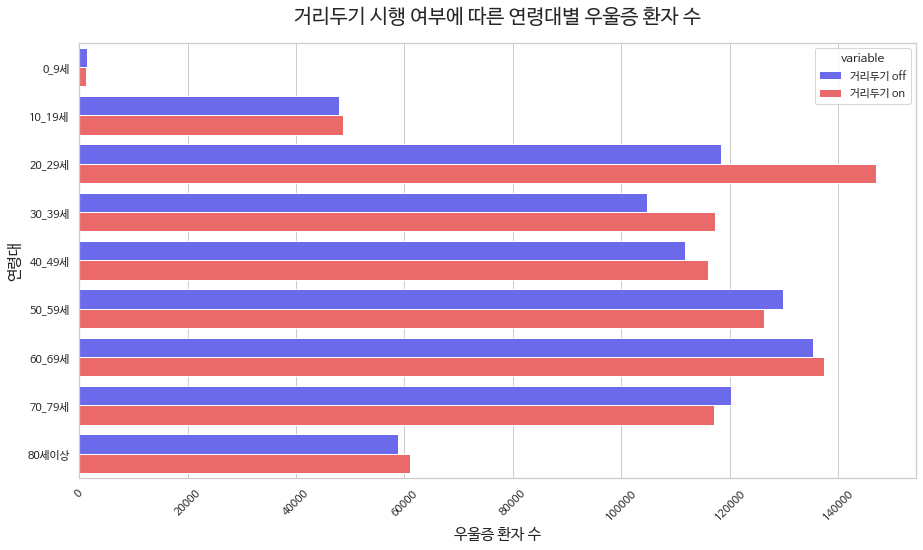

In [ ]:
sns.set_theme( style="whitegrid")
plt.rc('font', family='NanumBarunGothic')
plt.xticks(rotation=45)

g = sns.barplot(x='value', y='연령대', hue='variable', data=dep_data_group_melted, palette="seismic")
g.figure.set_size_inches(15, 8)

g.set_title("거리두기 시행 여부에 따른 연령대별 우울증 환자 수", fontsize=20, pad=20)
g.set_xlabel("우울증 환자 수", fontsize=15)
g.set_ylabel("연령대", fontsize=15)

plt.show()

# 2018년 1월~2022년 4월 우울증 키워드 상대적 검색량 비교

In [ ]:
KEYWORD_URL = "https://datatrend.kakao.com/api/search/trend?q=%EC%9A%B0%EC%9A%B8%EC%A6%9D&from=20180101&to=20220501&interval=m"

In [ ]:
response = requests.post(KEYWORD_URL)
response

<Response [200]>

In [ ]:
result1 = response.json()
result1

{'date': ['20180101',
  '20180201',
  '20180301',
  '20180401',
  '20180501',
  '20180601',
  '20180701',
  '20180801',
  '20180901',
  '20181001',
  '20181101',
  '20181201',
  '20190101',
  '20190201',
  '20190301',
  '20190401',
  '20190501',
  '20190601',
  '20190701',
  '20190801',
  '20190901',
  '20191001',
  '20191101',
  '20191201',
  '20200101',
  '20200201',
  '20200301',
  '20200401',
  '20200501',
  '20200601',
  '20200701',
  '20200801',
  '20200901',
  '20201001',
  '20201101',
  '20201201',
  '20210101',
  '20210201',
  '20210301',
  '20210401',
  '20210501',
  '20210601',
  '20210701',
  '20210801',
  '20210901',
  '20211001',
  '20211101',
  '20211201',
  '20220101',
  '20220201',
  '20220301',
  '20220401'],
 'keywords': ['우울증'],
 'list': [{'age': {'10': 1.0,
    '20': 7.0,
    '30': 19.0,
    '40': 37.0,
    '50': 24.0,
    '60': 12.0},
   'device': {'mobile': 68.0, 'pc': 32.0},
   'gender': {'female': 55.0, 'male': 45.0},
   'label': '우울증',
   'local': {'busan': 29

In [ ]:
date = result1["date"]

In [ ]:
search = result1["list"][0]["qc"]

In [ ]:
search_data = pd.DataFrame(date, search)
search_data

,0
76.0,20180101
49.0,20180201
64.0,20180301
67.0,20180401
66.0,20180501
58.0,20180601
68.0,20180701
56.0,20180801
51.0,20180901
60.0,20181001


In [ ]:
search_data = search_data.reset_index()
search_data.columns = ["검색량 변화 추이", "년월"]
search_data.head()

,검색량 변화 추이,년월
0,76.0,20180101
1,49.0,20180201
2,64.0,20180301
3,67.0,20180401
4,66.0,20180501


In [ ]:
cols = ["년월", "검색량 변화 추이"]
search_data = search_data[cols]
search_data.head()

,년월,검색량 변화 추이
0,20180101,76.0
1,20180201,49.0
2,20180301,64.0
3,20180401,67.0
4,20180501,66.0


In [ ]:
search_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   년월         52 non-null     object 
 1   검색량 변화 추이  52 non-null     float64
dtypes: float64(1), object(1)
memory usage: 960.0+ bytes


In [ ]:
search_data["년월"] = pd.to_datetime(search_data["년월"])

In [ ]:
search_data["년월"] = search_data["년월"].dt.strftime("%Y-%m")

In [ ]:
search_data.head()

,년월,검색량 변화 추이
0,2018-01,76.0
1,2018-02,49.0
2,2018-03,64.0
3,2018-04,67.0
4,2018-05,66.0


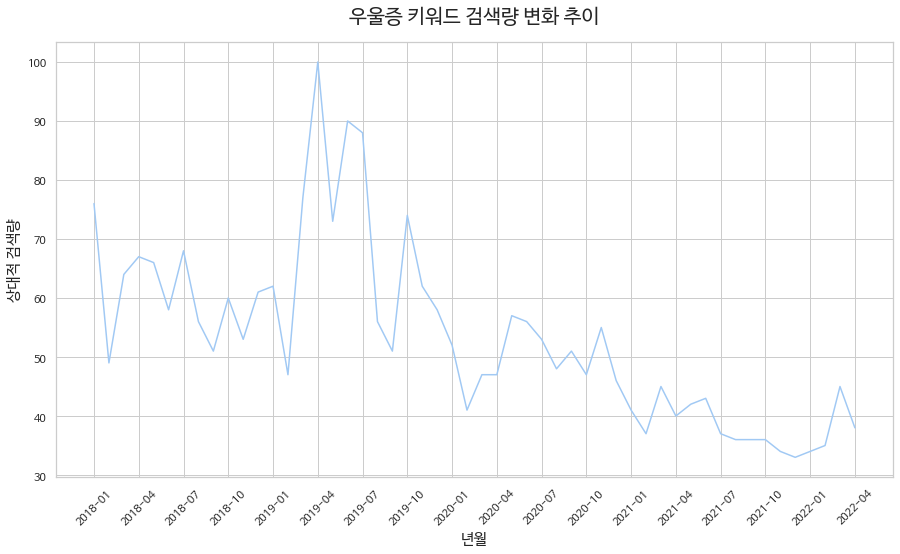

In [ ]:
sns.set_theme( style="whitegrid", palette="pastel" )
plt.rc('font', family='NanumBarunGothic')
plt.xticks(rotation=45)

g = sns.lineplot(x='년월', y='검색량 변화 추이', data=search_data)
g.figure.set_size_inches(15, 8)

g.xaxis.set_major_locator(ticker.MultipleLocator(3))

g.set_title("우울증 키워드 검색량 변화 추이", fontsize=20, pad=20)
g.set_xlabel("년월", fontsize=15)
g.set_ylabel("상대적 검색량", fontsize=15)

plt.show()

# 2018년 1월~2022년 4월 자살 키워드 상대적 검색량 비교

In [ ]:
KEYWORD_URL = "https://datatrend.kakao.com/api/search/trend?q=%EC%9E%90%EC%82%B4&from=20180101&to=20220501&interval=m"

In [ ]:
response = requests.post(KEYWORD_URL)
response

<Response [200]>

In [ ]:
result2 = response.json()

In [ ]:
date = result2["date"]

In [ ]:
search = result2["list"][0]["qc"]

In [ ]:
search_data2 = pd.DataFrame(date, search)
search_data2

,0
74.0,20180101
57.0,20180201
92.0,20180301
66.0,20180401
59.0,20180501
55.0,20180601
69.0,20180701
55.0,20180801
57.0,20180901
56.0,20181001


In [ ]:
search_data2 = search_data2.reset_index()
search_data2
search_data2.columns = ["검색량 변화 추이", "년월"]
cols = ["년월", "검색량 변화 추이"]
search_data2 = search_data2[cols]
search_data2.head()

,년월,검색량 변화 추이
0,20180101,74.0
1,20180201,57.0
2,20180301,92.0
3,20180401,66.0
4,20180501,59.0


In [ ]:
search_data2["년월"] = pd.to_datetime(search_data2["년월"])
search_data2["년월"] = search_data2["년월"].dt.strftime("%Y-%m")
search_data2.head()

,년월,검색량 변화 추이
0,2018-01,74.0
1,2018-02,57.0
2,2018-03,92.0
3,2018-04,66.0
4,2018-05,59.0


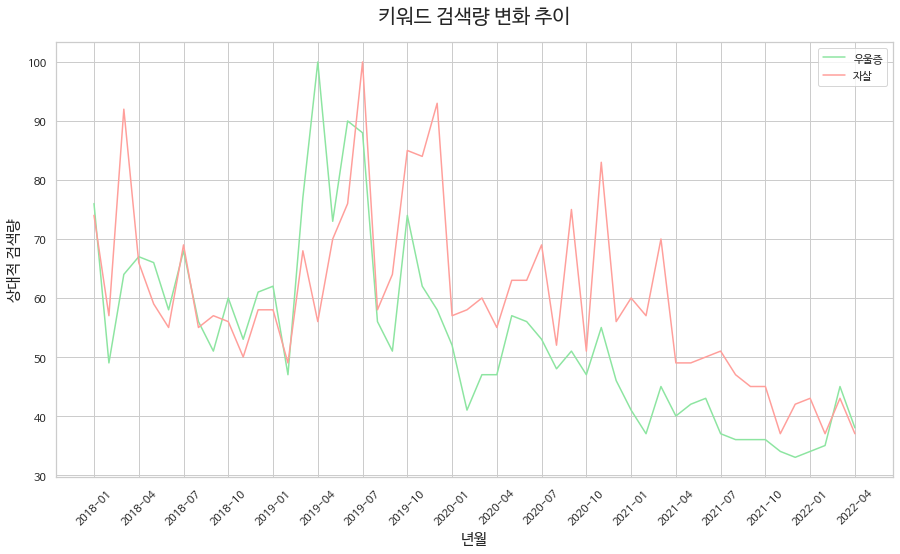

In [ ]:
sns.set_theme( style="whitegrid", palette="pastel" )
plt.rc('font', family='NanumBarunGothic')
plt.xticks(rotation=45)


sns.lineplot(x='년월', y='검색량 변화 추이', data=search_data, color="g")
g = sns.lineplot(x='년월', y='검색량 변화 추이', data=search_data2, color="r")
g.figure.set_size_inches(15, 8)

g.xaxis.set_major_locator(ticker.MultipleLocator(3))

g.set_title("키워드 검색량 변화 추이", fontsize=20, pad=20)
g.set_xlabel("년월", fontsize=15)
g.set_ylabel("상대적 검색량", fontsize=15)
plt.legend(["우울증", "자살"])

plt.show()